<a href="https://colab.research.google.com/github/awidy/Arief-Widy-Data-Analytics-Portfolio/blob/main/%5BW6_W8_AUG22%5D_Arief_Widyaiswara_M1_M2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**[MILESTONE 1]**

1.	**Read the data dictionary**. Familiarize yourself with the content of each table and the meaning of each column. Identify key columns you can use to join with other tables. Note any special values defined in the dictionary.
 
2.	Ask yourself: **what are the goals of this exercise?** | **How will your segmentation support the business objective?** Write it down in your deck, so you can refer to it when you build your deck in the next milestone.
 
3.	To understand the next step objective, please **transform your dataset**, by creating new columns, aggregating, or other actions. (***Hint: You may want to extract user-level information, such as end-of-period AUM, end-of-period invested amount, and total buy/sell/net transaction on monthly level instead of having daily user balance raw data***)

 **Assets under management (AUM)** is the market value of mutual fund held by each users every day.
Please input your interpretation result in your deck as well
 
4.	**Clean your data** and please elaborate ***why*** you choose to remove or not remove the data. This should include:

  *   Inspect unique values on each column and decide if anything is irrelevant to your analysis. Anything irrelevant can be removed from the final, clean data.
   * decide if anything is irrelevant to your analysis. Anything irrelevant can be removed from the final, clean data.
  * Check for the missing value. If you find any, decide how to handle it. Do you delete it? Or do you fill it with some values?
    * Check for duplicate rows and remove them.
    * Do outlier analysis and decide if you want to remove any outliers in the dataset. Are there any lurking Crazy Rich Asian people in the dataset?
    * Check the data types of each column and convert them to correct types.
    * String – if there are typos or abnormal string data, it needs to be transformed
    * Datetime/timestamp/time series: The data type should be time series (not string). Use df.info() anytime you need!

      **Combine your data into a single clean dataset.** Double-check the clean data for irrelevant values, missing values, duplicates, outliers, and data types. Refer to this clean dataset for further analysis.

5.	**Explore your clean dataset,** to provide some key insight into client characteristics. The best way to do this is to start with interesting questions (***3-5 different questions***). Few are listed below to be your ***source of inspiration***:
  * **Descriptive statistics** : 
        -	How many users do we have in the data? 
        -	What is the average AUM per user? What’s the AUM share of each type of mutual fund?
        -	How many users do transactions on any given day? And average monthly buy/sell per customer? Is there any behavioral difference between genders/occupations/levels of income? When was the last time users did transactions? (***HINT: User doing a transaction on any given day if their transaction amount is not zero or null. Check the data dictionary to know the meaning of negative or positive transaction amounts***)
        -	What is average current profit of each user?  (***HINT: Check the definition of profit in the data dictionary. Profit is typically stated as a percentage of the invested amount. Profit can be positive or negative.***)

   * **Identify key trends in the dataset.** Group the (balance) data by day, week, and month and visualize the time series of users, balance, and transactions. Is there any consistent “low season” and “high season”?  How about trends over time? Is it increasing? Decreasing? Stay the same? ***FYI: Market to sell/buy mutual funds are operating only on weekdays (Mon-Fri) and working days.***

#**[MILESTONE 2]** 
 
6.	**Create new columns based on your insight in step 4.** For example, you may want to create an “active transaction past 30 days” column for your clustering, so you can see the impact of user engagement on your segmentation. Or the “Gen-X flag” column to account for different socio-economic backgrounds of the users. The decision is all yours!
 
7.	Create client segmentation based on a clean dataset. This should include:
  -  	Form the segments using clustering methods (Hint: can be k-means clustering, RFM segmentation).
💡 Tips: When choosing your clustering, ensure you can answer the question: Why did I choose to use this method?
  -  	Ensure proper selection of the cluster, using elbow method, silhouette score, silhouette analysis, or other relevant metrics for the method
  -  	Use your clean data to find any feature that makes your cluster different from each other. For example, a cluster may capture a higher affinity toward the bond mutual fund, concentrate on some income level, or tends to have higher-frequency transactions
  -  	Re-read Business Background and link it to your clusters. Can you think of a theme that links both? For example, if you find a “rich stock investor“ cluster, think of a theme that connects stock investing, bond products, and “rich” (I would say: <<cue Uncle Roger>>  Crazy Rich, Go Diversify Ur Portfolio! Stock-Only Portfolio Are Dangerous Haiyaaa). Anyway: be creative!
  -  	Lastly, give the recommendation related to the theme. It may be recommended communication channels, messaging, or potential financial impact of the theme.
 
8.	Make that “short and simple” slide for Business. Use the Google Colab format in customer segmentation class and move the non-code explanation to Google Slides

# **DATASETS OVERVIEW**

1. [User](https://docs.google.com/spreadsheets/d/1gBjKgDply48-0td5y9rKm8zhSRs6a03kW3pYO_vgzU8/edit#gid=263649030)
2. [User's Balance](https://docs.google.com/spreadsheets/d/1VZ2IBLSjaqzumzO3GlO2PmXrGO8aRlAQcmcOIX8Jxic/edit#gid=1219501656)

# **IMPORT LIBRARY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn import cluster
from yellowbrick.cluster import SilhouetteVisualizer

# **DATASETS**

## **1. User's Dataset**

**DATA DICTIONARY - Users Dataset**
*   **user_id**: Client ID on the platform
*   **registration_import_datetime**: Registration time and date at UTC+7 timezone (WIB)
*   **user_gender**: User self-identified gender
*   **user_age**: User self-identified age
*   **user_occupation**: User self-identified job
*   **user_income_range**: User self-identified income range
*   **referral_code_used**: If user enter referral code during registration, the value is "used referral"; else will be Null valued
*   **user_income_source**: User self-declared source of income

In [ ]:
user_url = 'https://docs.google.com/spreadsheets/d/1gBjKgDply48-0td5y9rKm8zhSRs6a03kW3pYO_vgzU8/edit#gid=263649030'
user_url_trf = user_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_user = pd.read_csv(user_url_trf)
df_user

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji
...,...,...,...,...,...,...,...,...
14707,4352347,2021-10-17 15:57:23,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji
14708,4288026,2021-10-15 12:44:05,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,NaN,Lainnya
14709,4286882,2021-10-11 10:06:15,Female,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Dari Suami / istri
14710,4396739,2021-10-21 13:42:20,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji


In [ ]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
dtypes: int64(2), object(6)
memory usage: 919.6+ KB


```
From the informationa above, we can draw several points :
  1. Users Dataset consist of 8 columns & 14712 rows
  2. There are a data type that did not match (registration_import_datetime)
```

## **2. User's Balance Dataset**

**DATA DICTIONARY - User's Balance Dataset**

*   **user_id** Client ID on the platform
*   **date** Date of the user balance
*   **Saham_AUM** AUM of equity mutual fund held by client to date
*   **Saham_invested_amount** The total price paid by client to buy equity mutual fund to date.
*   **Saham_transaction_amount** Total value of transaction to buy (if positive) or sell (if negative) equity mutual fund on the date. If there's no transaction, the value should be 0 or NA
*   **Pasar_Uang_AUM** AUM of money market mutual fund held by client to date
*   **Pasar_Uang_invested_amount** The total price paid by client to buy money market mutual fund to date
*   **Pasar_Uang_transaction_amount** Total value of transaction to buy (if positive) or sell (if negative) money market mutual fund on the date. If there's no transaction, the value should be 0 or NA
*   **Pendapatan_Tetap_AUM** AUM of fixed income mutual fund held by client to date
*   **Pendapatan_Tetap_invested_amount** The total price paid by client to buy fixed income mutual fund to date
*   **Pendapatan_Tetap_transaction_amount** Total value of transaction to buy (if positive) or sell (if negative) fixed income mutual fund on the date. If there's no transaction, the value should be 0 or NA
*   **Campuran_AUM** AUM of mixed mutual fund held by client to date
*   **Campuran_invested_amount** The total price paid by client to buy mixed mutual fund to date
*   **Campuran_transaction_amount**' Total value of transaction to buy (if positive) or sell (if negative) mixed mutual fund on the date. If there's no transaction, the value should be 0 or NA

**DATA DICTIONARY - Definition**
*   **AUM** Asset Under Management. This is the market value of mutual fund held by each users every day
*   **Invested Amount** The total price paid by client to buy mutual fund to date.
*   **Buy transaction** If transaction amount > 0
*   **Sell transaction** If transaction amount < 0
*   **Net transaction** Total buy transaction - total sell transaction within a period of time
*   **Profit/Loss**
The difference between AUM and Invested Amount. Example: AUM = 1500 Invested Amount = 1000 means Profit = 1500-1000 = 500. If the difference positive
it's Profit, if negative Loss

In [ ]:
balance_url = 'https://docs.google.com/spreadsheets/d/1VZ2IBLSjaqzumzO3GlO2PmXrGO8aRlAQcmcOIX8Jxic/edit#gid=1219501656'
balance_url_trf = balance_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_balance = pd.read_csv(balance_url_trf)
df_balance

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10132277.0,10000000.0,NaN
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10206945.0,10000000.0,0.0
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9956556.0,10000000.0,0.0
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9914858.0,10000000.0,0.0
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10016360.0,10000000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158807,4165132,2021-09-30,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158808,4165630,2021-09-30,41625.0,40000.0,NaN,10001.0,10000.0,NaN,49869.0,50000.0,NaN,NaN,NaN,NaN
158809,4165704,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,9987.0,10000.0,NaN,NaN,NaN,NaN


In [ ]:
df_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   user_id                              158811 non-null  int64  
 1   date                                 158811 non-null  object 
 2   Saham_AUM                            106292 non-null  float64
 3   Saham_invested_amount                106292 non-null  float64
 4   Saham_transaction_amount             100839 non-null  float64
 5   Pasar_Uang_AUM                       131081 non-null  float64
 6   Pasar_Uang_invested_amount           131081 non-null  float64
 7   Pasar_Uang_transaction_amount        124273 non-null  float64
 8   Pendapatan_Tetap_AUM                 105946 non-null  float64
 9   Pendapatan_Tetap_invested_amount     105946 non-null  float64
 10  Pendapatan_Tetap_transaction_amount  100497 non-null  float64
 11  Campuran_AUM 

```
From the informationa above, we can draw several points:
  1. Users Dataset consist of 14 columns & 158811 rows
  2. There are a data type that did not match (date)
```

# **DATA CLEANING**

## **1. Removing Irrelevant Values**

`I decided not to remove any values in any datasets, because it could be usefull in the future`

## **2. Handling Missing Values**

**1.   User's Dataset**


In [ ]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
dtypes: int64(2), object(6)
memory usage: 919.6+ KB


In [ ]:
df_user.nunique()

user_id                         14712
registration_import_datetime    11536
user_gender                         2
user_age                           58
user_occupation                     9
user_income_range                   6
referral_code_used                  1
user_income_source                 10
dtype: int64

In [ ]:
df_user.count()

user_id                         14712
registration_import_datetime    14712
user_gender                     14712
user_age                        14712
user_occupation                 14712
user_income_range               14712
referral_code_used               5604
user_income_source              14712
dtype: int64

In [ ]:
df_user['referral_code_used'].nunique()

1

In [ ]:
df_user['referral_code_used'].value_counts()

used referral    5604
Name: referral_code_used, dtype: int64

In [ ]:
 df_user['referral_code_used'] = df_user['referral_code_used'].fillna('unused referral')

In [ ]:
df_user.isna().sum()

user_id                         0
registration_import_datetime    0
user_gender                     0
user_age                        0
user_occupation                 0
user_income_range               0
referral_code_used              0
user_income_source              0
dtype: int64

```
Decided to fill the NaN Value in referral_code_used coloumn
```

**2.   User's Balance Dataset**


In [ ]:
df_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   user_id                              158811 non-null  int64  
 1   date                                 158811 non-null  object 
 2   Saham_AUM                            106292 non-null  float64
 3   Saham_invested_amount                106292 non-null  float64
 4   Saham_transaction_amount             100839 non-null  float64
 5   Pasar_Uang_AUM                       131081 non-null  float64
 6   Pasar_Uang_invested_amount           131081 non-null  float64
 7   Pasar_Uang_transaction_amount        124273 non-null  float64
 8   Pendapatan_Tetap_AUM                 105946 non-null  float64
 9   Pendapatan_Tetap_invested_amount     105946 non-null  float64
 10  Pendapatan_Tetap_transaction_amount  100497 non-null  float64
 11  Campuran_AUM 

In [ ]:
df_balance.nunique()

user_id                                 8277
date                                      42
Saham_AUM                              47743
Saham_invested_amount                   1084
Saham_transaction_amount                 808
Pasar_Uang_AUM                         28408
Pasar_Uang_invested_amount              1157
Pasar_Uang_transaction_amount            719
Pendapatan_Tetap_AUM                   44519
Pendapatan_Tetap_invested_amount        1386
Pendapatan_Tetap_transaction_amount      847
Campuran_AUM                            3871
Campuran_invested_amount                  88
Campuran_transaction_amount               57
dtype: int64

In [ ]:
df_balance.count()

user_id                                158811
date                                   158811
Saham_AUM                              106292
Saham_invested_amount                  106292
Saham_transaction_amount               100839
Pasar_Uang_AUM                         131081
Pasar_Uang_invested_amount             131081
Pasar_Uang_transaction_amount          124273
Pendapatan_Tetap_AUM                   105946
Pendapatan_Tetap_invested_amount       105946
Pendapatan_Tetap_transaction_amount    100497
Campuran_AUM                             5352
Campuran_invested_amount                 5352
Campuran_transaction_amount              5117
dtype: int64

In [ ]:
df_balance.isna().sum()

user_id                                     0
date                                        0
Saham_AUM                               52519
Saham_invested_amount                   52519
Saham_transaction_amount                57972
Pasar_Uang_AUM                          27730
Pasar_Uang_invested_amount              27730
Pasar_Uang_transaction_amount           34538
Pendapatan_Tetap_AUM                    52865
Pendapatan_Tetap_invested_amount        52865
Pendapatan_Tetap_transaction_amount     58314
Campuran_AUM                           153459
Campuran_invested_amount               153459
Campuran_transaction_amount            153694
dtype: int64

In [ ]:
 df_balance = df_balance.fillna(0)

In [ ]:
df_balance.isna().sum()

user_id                                0
date                                   0
Saham_AUM                              0
Saham_invested_amount                  0
Saham_transaction_amount               0
Pasar_Uang_AUM                         0
Pasar_Uang_invested_amount             0
Pasar_Uang_transaction_amount          0
Pendapatan_Tetap_AUM                   0
Pendapatan_Tetap_invested_amount       0
Pendapatan_Tetap_transaction_amount    0
Campuran_AUM                           0
Campuran_invested_amount               0
Campuran_transaction_amount            0
dtype: int64

```
Decided to fill the NaN Value in null coloumns with value = 0
```

## **3. Duplicate Values**

**1.   User's Dataset**


In [ ]:
df_user.duplicated().sum()

0

**2.   User's Balance Dataset**


In [ ]:
df_balance.duplicated().sum()

0

```
There's no duplicates values in each df
```

## **4. Convert Data Types**

**1.   User's Dataset**


In [ ]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            14712 non-null  object
 7   user_income_source            14712 non-null  object
dtypes: int64(2), object(6)
memory usage: 919.6+ KB


In [ ]:
df_user['user_id'] = df_user['user_id'].astype(str) 
df_user['registration_import_datetime'] = pd.to_datetime(df_user['registration_import_datetime']).dt.normalize()

df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  object        
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   referral_code_used            14712 non-null  object        
 7   user_income_source            14712 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 919.6+ KB


**2.   User's Balance Dataset**


In [ ]:
df_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   user_id                              158811 non-null  int64  
 1   date                                 158811 non-null  object 
 2   Saham_AUM                            158811 non-null  float64
 3   Saham_invested_amount                158811 non-null  float64
 4   Saham_transaction_amount             158811 non-null  float64
 5   Pasar_Uang_AUM                       158811 non-null  float64
 6   Pasar_Uang_invested_amount           158811 non-null  float64
 7   Pasar_Uang_transaction_amount        158811 non-null  float64
 8   Pendapatan_Tetap_AUM                 158811 non-null  float64
 9   Pendapatan_Tetap_invested_amount     158811 non-null  float64
 10  Pendapatan_Tetap_transaction_amount  158811 non-null  float64
 11  Campuran_AUM 

In [ ]:
df_balance['user_id'] = df_balance['user_id'].astype(str) 
df_balance['date'] = pd.to_datetime(df_balance['date'])

df_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  object        
 1   date                                 158811 non-null  datetime64[ns]
 2   Saham_AUM                            158811 non-null  float64       
 3   Saham_invested_amount                158811 non-null  float64       
 4   Saham_transaction_amount             158811 non-null  float64       
 5   Pasar_Uang_AUM                       158811 non-null  float64       
 6   Pasar_Uang_invested_amount           158811 non-null  float64       
 7   Pasar_Uang_transaction_amount        158811 non-null  float64       
 8   Pendapatan_Tetap_AUM                 158811 non-null  float64       
 9   Pendapatan_Tetap_invested_amount     158811 non-null  float64       
 

## **5. String Manipulation**

**1.   User's Balance Dataset**


In [ ]:
df_balance.head()

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,50701,2021-08-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10132277.0,10000000.0,0.0
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10206945.0,10000000.0,0.0
2,50701,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9956556.0,10000000.0,0.0
3,50701,2021-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9914858.0,10000000.0,0.0
4,50701,2021-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10016360.0,10000000.0,0.0


In [ ]:
df_balance.columns = df_balance.columns.str.lower()
df_balance.columns

Index(['user_id', 'date', 'saham_aum', 'saham_invested_amount',
       'saham_transaction_amount', 'pasar_uang_aum',
       'pasar_uang_invested_amount', 'pasar_uang_transaction_amount',
       'pendapatan_tetap_aum', 'pendapatan_tetap_invested_amount',
       'pendapatan_tetap_transaction_amount', 'campuran_aum',
       'campuran_invested_amount', 'campuran_transaction_amount'],
      dtype='object')

In [ ]:
df_balance['total_aum'] = df_balance['saham_aum'] + df_balance['pasar_uang_aum'] + df_balance['pendapatan_tetap_aum'] +  df_balance['campuran_aum']
df_balance['total_invested'] = df_balance['saham_invested_amount'] + df_balance['pasar_uang_invested_amount'] + df_balance['pendapatan_tetap_invested_amount'] +  df_balance['campuran_invested_amount']
df_balance['total_transaction'] = df_balance['saham_transaction_amount'] + df_balance['pasar_uang_transaction_amount'] + df_balance['pendapatan_tetap_transaction_amount'] +  df_balance['campuran_transaction_amount']
df_balance['profit'] = df_balance['total_aum'] - df_balance['total_invested']
df_balance

,user_id,date,saham_aum,saham_invested_amount,saham_transaction_amount,pasar_uang_aum,pasar_uang_invested_amount,pasar_uang_transaction_amount,pendapatan_tetap_aum,pendapatan_tetap_invested_amount,pendapatan_tetap_transaction_amount,campuran_aum,campuran_invested_amount,campuran_transaction_amount,total_aum,total_invested,total_transaction,profit
0,50701,2021-08-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10132277.0,10000000.0,0.0,10132277.0,10000000.0,0.0,132277.0
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10206945.0,10000000.0,0.0,10206945.0,10000000.0,0.0,206945.0
2,50701,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9956556.0,10000000.0,0.0,9956556.0,10000000.0,0.0,-43444.0
3,50701,2021-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9914858.0,10000000.0,0.0,9914858.0,10000000.0,0.0,-85142.0
4,50701,2021-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10016360.0,10000000.0,0.0,10016360.0,10000000.0,0.0,16360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158807,4165132,2021-09-30,0.0,0.0,0.0,10001.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10001.0,10000.0,0.0,1.0
158808,4165630,2021-09-30,41625.0,40000.0,0.0,10001.0,10000.0,0.0,49869.0,50000.0,0.0,0.0,0.0,0.0,101495.0,100000.0,0.0,1495.0
158809,4165704,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,9987.0,10000.0,0.0,0.0,0.0,0.0,9987.0,10000.0,0.0,-13.0


## **6. Handling Outliers**

**1.   User's Dataset Boxplot**

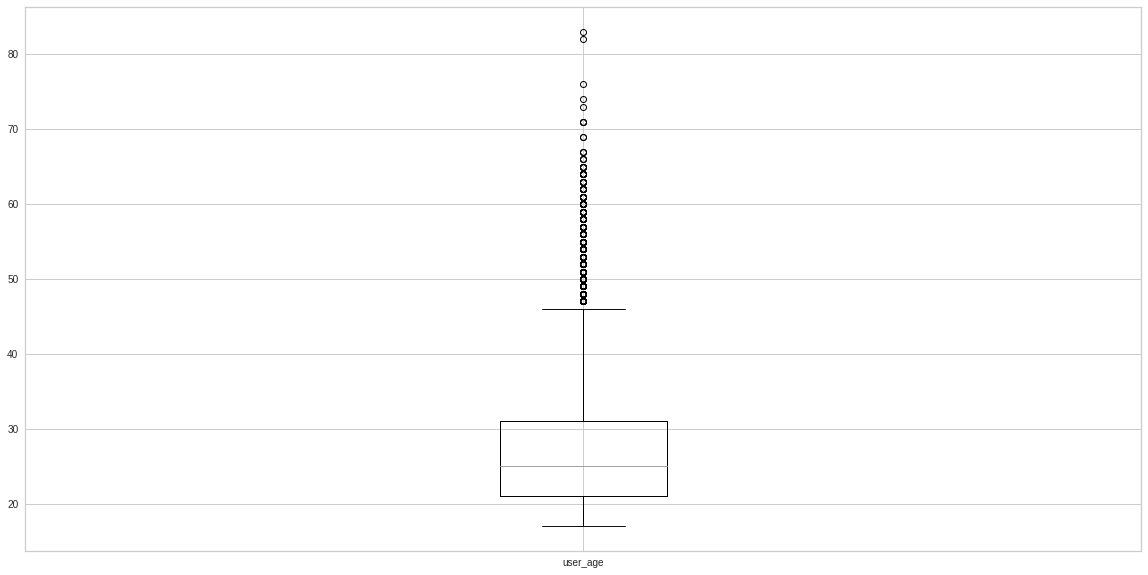

In [ ]:
col_list = ['user_age']
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(20,10))

# for 0 (i) , Income (el)
for i,el in enumerate(col_list):
    a = df_user.boxplot()
plt.show()

**- Detect Outliers on User's Dataset**

In [ ]:
Q1 = df_user['user_age'].quantile(0.25)
Q3 = df_user['user_age'].quantile(0.75)
IQR = Q3 - Q1

LIF = Q1 - 1.5 * IQR # lower inner fence
UIF = Q3 + 1.5 * IQR # upper inner fence

name = ['Q1','Q3','IQR','LIF','UIF']
value = [Q1, Q3, IQR, LIF, UIF]

for i in range(len(name)):
  print(f'  {name[i]}  :  {value[i]}')

  Q1  :  21.0
  Q3  :  31.0
  IQR  :  10.0
  LIF  :  6.0
  UIF  :  46.0


**- Remove Outliers on User's Dataset**

In [ ]:
f_lif = df_user['user_age'] < LIF
f_uif = df_user['user_age'] > UIF
df_user = df_user.loc[~(f_lif | f_uif)]

In [ ]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14060 entries, 495 to 14554
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14060 non-null  object        
 1   registration_import_datetime  14060 non-null  datetime64[ns]
 2   user_gender                   14060 non-null  object        
 3   user_age                      14060 non-null  int64         
 4   user_occupation               14060 non-null  object        
 5   user_income_range             14060 non-null  object        
 6   referral_code_used            14060 non-null  object        
 7   user_income_source            14060 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 988.6+ KB


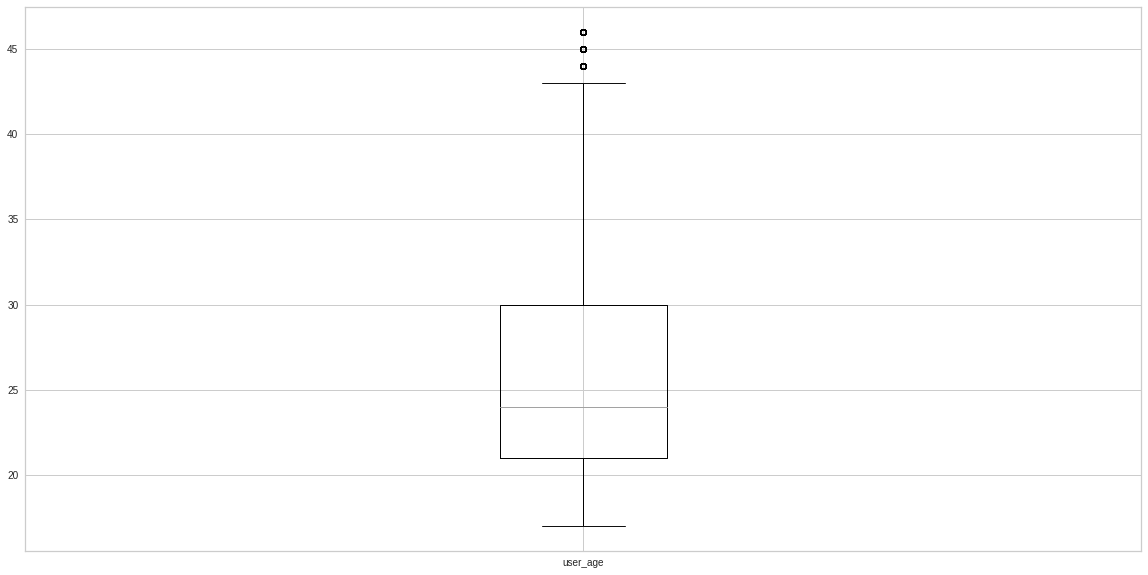

In [ ]:
col_list = ['user_age']
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(20,10))

# for 0 (i) , Income (el)
for i,el in enumerate(col_list):
    a = df_user.boxplot()
plt.show()

```
User Dataset after remove the outliers is 14060 (from 14712 / 4,5% from data)
This outliers removed cause we want to know the average age of the user more clearly.
```

**2.   User's Balance Dataset Boxplot**

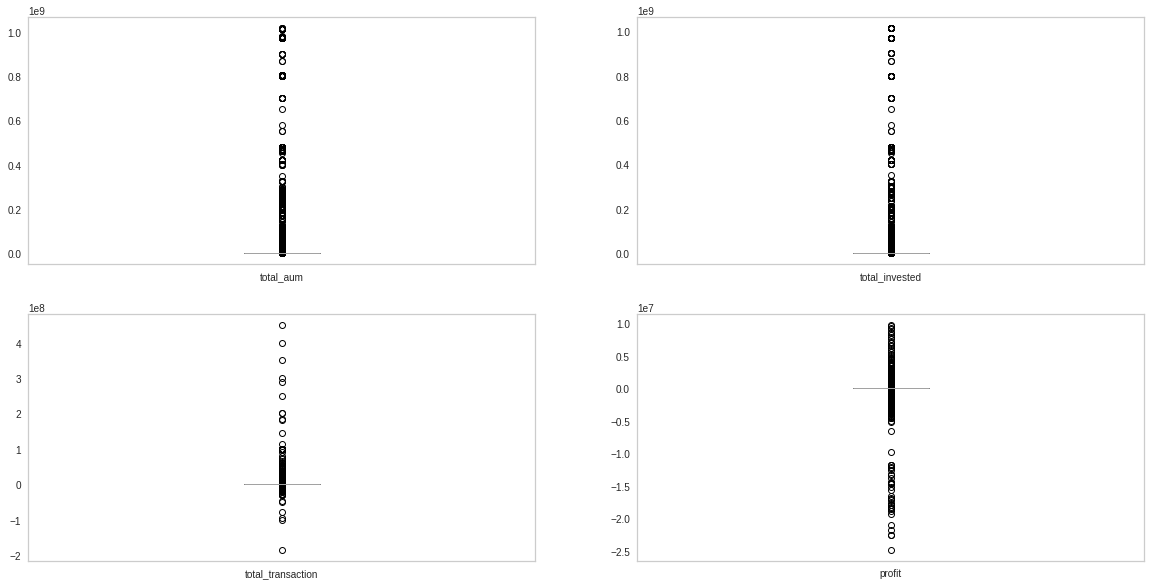

In [ ]:
col_list = ['total_aum','total_invested','total_transaction','profit']

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20,10))

# for 0 (i) , Income (el)
for i,el in enumerate(col_list):
    b = df_balance.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

**- Detect Outliers**

In [ ]:
Q1 = df_balance['total_aum'].quantile(0.25)
Q3 = df_balance['total_aum'].quantile(0.75)
IQR = Q3 - Q1

LIF = Q1 - 1.5 * IQR # lower inner fence
UIF = Q3 + 1.5 * IQR # upper inner fence

name = ['Q1','Q3','IQR','LIF','UIF']
value = [Q1, Q3, IQR, LIF, UIF]

for i in range(len(name)):
  print(f'  {name[i]}  :  {value[i]}')

  Q1  :  10015.0
  Q3  :  501309.5
  IQR  :  491294.5
  LIF  :  -726926.75
  UIF  :  1238251.25


In [ ]:
Q1 = df_balance['total_invested'].quantile(0.25)
Q3 = df_balance['total_invested'].quantile(0.75)
IQR = Q3 - Q1

LIF = Q1 - 1.5 * IQR # lower inner fence
UIF = Q3 + 1.5 * IQR # upper inner fence

name = ['Q1','Q3','IQR','LIF','UIF']
value = [Q1, Q3, IQR, LIF, UIF]

for i in range(len(name)):
  print(f'  {name[i]}  :  {value[i]}')

  Q1  :  10000.0
  Q3  :  500000.0
  IQR  :  490000.0
  LIF  :  -725000.0
  UIF  :  1235000.0


In [ ]:
Q1 = df_balance['total_transaction'].quantile(0.25)
Q3 = df_balance['total_transaction'].quantile(0.75)
IQR = Q3 - Q1

LIF = Q1 - 1.5 * IQR # lower inner fence
UIF = Q3 + 1.5 * IQR # upper inner fence

name = ['Q1','Q3','IQR','LIF','UIF']
value = [Q1, Q3, IQR, LIF, UIF]

for i in range(len(name)):
  print(f'  {name[i]}  :  {value[i]}')

  Q1  :  0.0
  Q3  :  0.0
  IQR  :  0.0
  LIF  :  0.0
  UIF  :  0.0


In [ ]:
Q1 = df_balance['profit'].quantile(0.25)
Q3 = df_balance['profit'].quantile(0.75)
IQR = Q3 - Q1

LIF = Q1 - 1.5 * IQR # lower inner fence
UIF = Q3 + 1.5 * IQR # upper inner fence

name = ['Q1','Q3','IQR','LIF','UIF']
value = [Q1, Q3, IQR, LIF, UIF]

for i in range(len(name)):
  print(f'  {name[i]}  :  {value[i]}')

  Q1  :  0.0
  Q3  :  1312.0
  IQR  :  1312.0
  LIF  :  -1968.0
  UIF  :  3280.0


```
I've decided not to remove the outliers cause majority of the data is filled with 0.
```

## **7. Combine Datasets**

In [ ]:
df_combine = df_user.merge(df_balance, how = 'inner', left_on = 'user_id', right_on = 'user_id')
df_combine

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,date,saham_aum,...,pendapatan_tetap_aum,pendapatan_tetap_invested_amount,pendapatan_tetap_transaction_amount,campuran_aum,campuran_invested_amount,campuran_transaction_amount,total_aum,total_invested,total_transaction,profit
0,2431071,2021-09-03,Female,17,Pelajar,Rp 10 Juta - 50 Juta,unused referral,Undian,2021-09-08,186506.0,...,269650.0,270000.0,0.0,0.0,0.0,0.0,496163.0,500000.0,0.0,-3837.0
1,2431071,2021-09-03,Female,17,Pelajar,Rp 10 Juta - 50 Juta,unused referral,Undian,2021-09-09,188270.0,...,269483.0,270000.0,0.0,0.0,0.0,0.0,497757.0,500000.0,0.0,-2243.0
2,2431071,2021-09-03,Female,17,Pelajar,Rp 10 Juta - 50 Juta,unused referral,Undian,2021-09-10,189251.0,...,269874.0,270000.0,0.0,0.0,0.0,0.0,499117.0,500000.0,0.0,-883.0
3,2431071,2021-09-03,Female,17,Pelajar,Rp 10 Juta - 50 Juta,unused referral,Undian,2021-09-13,188654.0,...,269932.0,270000.0,0.0,0.0,0.0,0.0,498585.0,500000.0,0.0,-1415.0
4,2431071,2021-09-03,Female,17,Pelajar,Rp 10 Juta - 50 Juta,unused referral,Undian,2021-09-14,190087.0,...,270238.0,270000.0,0.0,0.0,0.0,0.0,500330.0,500000.0,0.0,330.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151536,3802513,2021-08-10,Female,46,IRT,< 10 Juta,unused referral,Gaji,2021-09-24,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10032.0,10000.0,0.0,32.0
151537,3802513,2021-08-10,Female,46,IRT,< 10 Juta,unused referral,Gaji,2021-09-27,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10037.0,10000.0,0.0,37.0
151538,3802513,2021-08-10,Female,46,IRT,< 10 Juta,unused referral,Gaji,2021-09-28,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10037.0,10000.0,0.0,37.0
151539,3802513,2021-08-10,Female,46,IRT,< 10 Juta,unused referral,Gaji,2021-09-29,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10034.0,10000.0,0.0,34.0


In [ ]:
df_combined = df_combine.copy()

df_combined.drop(['saham_aum', 'saham_invested_amount', 'saham_transaction_amount', 'pasar_uang_aum', 'pasar_uang_invested_amount', 'pasar_uang_transaction_amount','pendapatan_tetap_aum', 'pendapatan_tetap_invested_amount',
       'pendapatan_tetap_transaction_amount', 'campuran_aum',
       'campuran_invested_amount', 'campuran_transaction_amount'], axis=1, inplace=True)
df_combined.head(10)

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,date,total_aum,total_invested,total_transaction,profit
0,2431071,2021-09-03,Female,17,Pelajar,Rp 10 Juta - 50 Juta,unused referral,Undian,2021-09-08,496163.0,500000.0,0.0,-3837.0
1,2431071,2021-09-03,Female,17,Pelajar,Rp 10 Juta - 50 Juta,unused referral,Undian,2021-09-09,497757.0,500000.0,0.0,-2243.0
2,2431071,2021-09-03,Female,17,Pelajar,Rp 10 Juta - 50 Juta,unused referral,Undian,2021-09-10,499117.0,500000.0,0.0,-883.0
3,2431071,2021-09-03,Female,17,Pelajar,Rp 10 Juta - 50 Juta,unused referral,Undian,2021-09-13,498585.0,500000.0,0.0,-1415.0
4,2431071,2021-09-03,Female,17,Pelajar,Rp 10 Juta - 50 Juta,unused referral,Undian,2021-09-14,500330.0,500000.0,0.0,330.0
5,2431071,2021-09-03,Female,17,Pelajar,Rp 10 Juta - 50 Juta,unused referral,Undian,2021-09-15,499562.0,500000.0,0.0,-438.0
6,2431071,2021-09-03,Female,17,Pelajar,Rp 10 Juta - 50 Juta,unused referral,Undian,2021-09-16,499127.0,500000.0,0.0,-873.0
7,2431071,2021-09-03,Female,17,Pelajar,Rp 10 Juta - 50 Juta,unused referral,Undian,2021-09-17,496939.0,500000.0,0.0,-3061.0
8,2431071,2021-09-03,Female,17,Pelajar,Rp 10 Juta - 50 Juta,unused referral,Undian,2021-09-20,494761.0,500000.0,0.0,-5239.0
9,2431071,2021-09-03,Female,17,Pelajar,Rp 10 Juta - 50 Juta,unused referral,Undian,2021-09-21,494493.0,500000.0,0.0,-5507.0


In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151541 entries, 0 to 151540
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   user_id                       151541 non-null  object        
 1   registration_import_datetime  151541 non-null  datetime64[ns]
 2   user_gender                   151541 non-null  object        
 3   user_age                      151541 non-null  int64         
 4   user_occupation               151541 non-null  object        
 5   user_income_range             151541 non-null  object        
 6   referral_code_used            151541 non-null  object        
 7   user_income_source            151541 non-null  object        
 8   date                          151541 non-null  datetime64[ns]
 9   total_aum                     151541 non-null  float64       
 10  total_invested                151541 non-null  float64       
 11  total_transac

## **8. Transform Data**

### Monthly

**1. End-of-period AUM, Invested Amount, Transaction, and Profit**

In [ ]:
eop_m = df_combined.groupby([df_combined['user_id'], df_combined['date'].dt.to_period('M'),df_combined['user_age'],
                           df_combined['user_gender'],df_combined['user_occupation'],df_combined['user_income_source'],df_combined['user_income_range']])['total_aum','total_invested','total_transaction','profit'].sum().reset_index()
eop_m

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,user_id,date,user_age,user_gender,user_occupation,user_income_source,user_income_range,total_aum,total_invested,total_transaction,profit
0,1004326,2021-08,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"1,806,320.0","1,800,000.0",0.0,"6,320.0"
1,1004326,2021-09,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"4,438,228.0","4,400,000.0",0.0,"38,228.0"
2,1005053,2021-09,31,Male,Swasta,Gaji,> Rp 50 Juta - 100 Juta,"404,275.0","400,000.0",0.0,"4,275.0"
3,1005165,2021-09,22,Female,Pelajar,Undian,< 10 Juta,"2,100,625.0","2,100,000.0",0.0,625.0
4,1018814,2021-08,20,Male,Others,Undian,< 10 Juta,"1,300,639.0","1,300,000.0",0.0,639.0
...,...,...,...,...,...,...,...,...,...,...,...
10828,990466,2021-08,33,Male,Swasta,Gaji,< 10 Juta,"1,005,518.0","1,000,000.0",0.0,"5,518.0"
10829,990466,2021-09,33,Male,Swasta,Gaji,< 10 Juta,"23,469,244.0","23,240,000.0","1,500,000.0","229,244.0"
10830,99245,2021-09,25,Male,Pelajar,Gaji,< 10 Juta,"11,016,945.0","11,000,000.0",0.0,"16,945.0"
10831,997938,2021-08,27,Male,Others,Gaji,< 10 Juta,"851,499.0","850,000.0",0.0,"1,499.0"


**2. Total Buy / Sell / Net Transaction on Monthly Level**

In [ ]:
eop_net = df_combined.groupby([df_combined['user_id'], df_combined['date'].dt.to_period('M')]).sum().reset_index()


eop_net['buy'] = np.where(eop_net['total_transaction'] > 0, eop_net['total_transaction'], 0)
eop_net['sell'] = np.where(eop_net['total_transaction'] < 0, eop_net['total_transaction'], 0)
eop_net['net'] = eop_net['buy'] - eop_net['sell']

eop_net = eop_net[['user_id', 'date', 'buy', 'sell', 'net']]
eop_net

,user_id,date,buy,sell,net
0,1004326,2021-08,0.0,0.0,0.0
1,1004326,2021-09,0.0,0.0,0.0
2,1005053,2021-09,0.0,0.0,0.0
3,1005165,2021-09,0.0,0.0,0.0
4,1018814,2021-08,0.0,0.0,0.0
...,...,...,...,...,...
10828,990466,2021-08,0.0,0.0,0.0
10829,990466,2021-09,"1,500,000.0",0.0,"1,500,000.0"
10830,99245,2021-09,0.0,0.0,0.0
10831,997938,2021-08,0.0,0.0,0.0


As the Dictionary said: 


**Net transaction** = **Total buy transaction** - **total sell transaction within a period of time**

**3. Merged 1-2**

In [ ]:
df_eop = eop_m.merge(eop_net,how='left',left_on=['user_id','date'], right_on=['user_id','date'])
df_eop

,user_id,date,user_age,user_gender,user_occupation,user_income_source,user_income_range,total_aum,total_invested,total_transaction,profit,buy,sell,net
0,1004326,2021-08,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"1,806,320.0","1,800,000.0",0.0,"6,320.0",0.0,0.0,0.0
1,1004326,2021-09,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"4,438,228.0","4,400,000.0",0.0,"38,228.0",0.0,0.0,0.0
2,1005053,2021-09,31,Male,Swasta,Gaji,> Rp 50 Juta - 100 Juta,"404,275.0","400,000.0",0.0,"4,275.0",0.0,0.0,0.0
3,1005165,2021-09,22,Female,Pelajar,Undian,< 10 Juta,"2,100,625.0","2,100,000.0",0.0,625.0,0.0,0.0,0.0
4,1018814,2021-08,20,Male,Others,Undian,< 10 Juta,"1,300,639.0","1,300,000.0",0.0,639.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10828,990466,2021-08,33,Male,Swasta,Gaji,< 10 Juta,"1,005,518.0","1,000,000.0",0.0,"5,518.0",0.0,0.0,0.0
10829,990466,2021-09,33,Male,Swasta,Gaji,< 10 Juta,"23,469,244.0","23,240,000.0","1,500,000.0","229,244.0","1,500,000.0",0.0,"1,500,000.0"
10830,99245,2021-09,25,Male,Pelajar,Gaji,< 10 Juta,"11,016,945.0","11,000,000.0",0.0,"16,945.0",0.0,0.0,0.0
10831,997938,2021-08,27,Male,Others,Gaji,< 10 Juta,"851,499.0","850,000.0",0.0,"1,499.0",0.0,0.0,0.0


In [ ]:
df_eop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10833 entries, 0 to 10832
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype    
---  ------              --------------  -----    
 0   user_id             10833 non-null  object   
 1   date                10833 non-null  period[M]
 2   user_age            10833 non-null  int64    
 3   user_gender         10833 non-null  object   
 4   user_occupation     10833 non-null  object   
 5   user_income_source  10833 non-null  object   
 6   user_income_range   10833 non-null  object   
 7   total_aum           10833 non-null  float64  
 8   total_invested      10833 non-null  float64  
 9   total_transaction   10833 non-null  float64  
 10  profit              10833 non-null  float64  
 11  buy                 10833 non-null  float64  
 12  sell                10833 non-null  float64  
 13  net                 10833 non-null  float64  
dtypes: float64(7), int64(1), object(5), period[M](1)
memory usage: 1.2+ MB

### Daily

**1. End-of-period AUM, Invested Amount, Transaction, and Profit**

In [ ]:
eop_d = df_combined.groupby([df_combined['user_id'], df_combined['date'].dt.to_period('D'),df_combined['user_age'],
                           df_combined['user_gender'],df_combined['user_occupation'],df_combined['user_income_source'],df_combined['user_income_range']])['total_aum','total_invested','total_transaction','profit'].sum().reset_index()
eop_d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,user_id,date,user_age,user_gender,user_occupation,user_income_source,user_income_range,total_aum,total_invested,total_transaction,profit
0,1004326,2021-08-19,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"199,938.0","200,000.0",0.0,-62.0
1,1004326,2021-08-20,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"200,370.0","200,000.0",0.0,370.0
2,1004326,2021-08-23,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"201,199.0","200,000.0",0.0,"1,199.0"
3,1004326,2021-08-24,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"200,552.0","200,000.0",0.0,552.0
4,1004326,2021-08-25,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"200,915.0","200,000.0",0.0,915.0
...,...,...,...,...,...,...,...,...,...,...,...
151536,997938,2021-09-24,27,Male,Others,Gaji,< 10 Juta,"401,593.0","400,000.0",0.0,"1,593.0"
151537,997938,2021-09-27,27,Male,Others,Gaji,< 10 Juta,"401,106.0","400,000.0",0.0,"1,106.0"
151538,997938,2021-09-28,27,Male,Others,Gaji,< 10 Juta,"401,590.0","400,000.0",0.0,"1,590.0"
151539,997938,2021-09-29,27,Male,Others,Gaji,< 10 Juta,"403,050.0","400,000.0",0.0,"3,050.0"


**2. Total Buy / Sell / Net Transaction on daily Level**

In [ ]:
eopd_net = df_combined.groupby([df_combined['user_id'], df_combined['date'].dt.to_period('D')]).sum().reset_index()


eopd_net['buy'] = np.where(eopd_net['total_transaction'] > 0, eopd_net['total_transaction'], 0)
eopd_net['sell'] = np.where(eopd_net['total_transaction'] < 0, eopd_net['total_transaction'], 0)
eopd_net['net'] = eopd_net['buy'] - eopd_net['sell']

eopd_net = eopd_net[['user_id', 'date', 'buy', 'sell', 'net']]
eopd_net

,user_id,date,buy,sell,net
0,1004326,2021-08-19,0.0,0.0,0.0
1,1004326,2021-08-20,0.0,0.0,0.0
2,1004326,2021-08-23,0.0,0.0,0.0
3,1004326,2021-08-24,0.0,0.0,0.0
4,1004326,2021-08-25,0.0,0.0,0.0
...,...,...,...,...,...
151536,997938,2021-09-24,0.0,0.0,0.0
151537,997938,2021-09-27,0.0,0.0,0.0
151538,997938,2021-09-28,0.0,0.0,0.0
151539,997938,2021-09-29,0.0,0.0,0.0


**3. Merged 1-2**

In [ ]:
df_eopd = eop_d.merge(eopd_net,how='left',left_on=['user_id','date'], right_on=['user_id','date'])
df_eopd

,user_id,date,user_age,user_gender,user_occupation,user_income_source,user_income_range,total_aum,total_invested,total_transaction,profit,buy,sell,net
0,1004326,2021-08-19,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"199,938.0","200,000.0",0.0,-62.0,0.0,0.0,0.0
1,1004326,2021-08-20,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"200,370.0","200,000.0",0.0,370.0,0.0,0.0,0.0
2,1004326,2021-08-23,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"201,199.0","200,000.0",0.0,"1,199.0",0.0,0.0,0.0
3,1004326,2021-08-24,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"200,552.0","200,000.0",0.0,552.0,0.0,0.0,0.0
4,1004326,2021-08-25,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"200,915.0","200,000.0",0.0,915.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151536,997938,2021-09-24,27,Male,Others,Gaji,< 10 Juta,"401,593.0","400,000.0",0.0,"1,593.0",0.0,0.0,0.0
151537,997938,2021-09-27,27,Male,Others,Gaji,< 10 Juta,"401,106.0","400,000.0",0.0,"1,106.0",0.0,0.0,0.0
151538,997938,2021-09-28,27,Male,Others,Gaji,< 10 Juta,"401,590.0","400,000.0",0.0,"1,590.0",0.0,0.0,0.0
151539,997938,2021-09-29,27,Male,Others,Gaji,< 10 Juta,"403,050.0","400,000.0",0.0,"3,050.0",0.0,0.0,0.0


In [ ]:
df_eopd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151541 entries, 0 to 151540
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype    
---  ------              --------------   -----    
 0   user_id             151541 non-null  object   
 1   date                151541 non-null  period[D]
 2   user_age            151541 non-null  int64    
 3   user_gender         151541 non-null  object   
 4   user_occupation     151541 non-null  object   
 5   user_income_source  151541 non-null  object   
 6   user_income_range   151541 non-null  object   
 7   total_aum           151541 non-null  float64  
 8   total_invested      151541 non-null  float64  
 9   total_transaction   151541 non-null  float64  
 10  profit              151541 non-null  float64  
 11  buy                 151541 non-null  float64  
 12  sell                151541 non-null  float64  
 13  net                 151541 non-null  float64  
dtypes: float64(7), int64(1), object(5), period[D](1)
mem

# **DESCRIPTIVE STATISTIC**

## **1. Categorical**

In [ ]:
category = df_eop.describe(exclude = np.number)
category

,user_id,date,user_gender,user_occupation,user_income_source,user_income_range
count,10833,10833,10833,10833,10833,10833
unique,7904,2,2,8,10,6
top,1004326,2021-09,Male,Pelajar,Gaji,< 10 Juta
freq,2,7904,6728,6249,6767,4775


**Summary**
- There are total of **10833** of users we have in the data 
- There are **6728 male** and **4105 female** users
- **Top transaction** happened in **September 2021** with total amount of transaction happened that day are **7904**
- **"Pelajar"** is the most recorded in the data as investor with total of **6249** person
- **Top investor** mostly had income range of < 10 Juta **(4775 person)**
- **Most investor** had **income source** from "gaji" **(6767 person)**

## **2. Numerical**

In [ ]:
descstat = df_eop.describe()
col_desc = ['user_age','total_aum', 'total_invested', 'total_transaction']
descstat.loc['skewness'] = df_eop[col_desc].skew()
descstat.loc['variance'] = df_eop[col_desc].var()

In [ ]:
pd.set_option('display.float_format',  '{:,}'.format)
descstat = round(descstat,2)
descstat

,user_age,total_aum,total_invested,total_transaction,profit,buy,sell,net
count,"10,833.0","10,833.0","10,833.0","10,833.0","10,833.0","10,833.0","10,833.0","10,833.0"
mean,26.0,"30,956,968.87","30,956,773.91","782,222.61",194.95,"874,494.16","-92,271.56","966,765.72"
std,6.63,"405,152,695.17","403,748,045.9","13,114,029.06","2,419,500.55","13,037,203.62","1,359,295.13","13,101,716.1"
min,17.0,0.0,0.0,"-90,994,774.0","-80,143,084.0",0.0,"-90,994,774.0",0.0
25%,21.0,"199,543.0","200,000.0",0.0,0.0,0.0,0.0,0.0
50%,24.0,"1,399,088.0","1,400,000.0",0.0,"1,016.0",0.0,0.0,0.0
75%,29.0,"5,520,895.0","5,500,000.0","27,000.0","12,546.0","27,000.0",0.0,"100,000.0"
max,46.0,"21,491,564,759.0","21,340,000,000.0","770,000,000.0","151,564,759.0","770,000,000.0",0.0,"770,000,000.0"
skewness,0.99,38.79,38.7,35.82,NaN,NaN,NaN,NaN
variance,43.95,1.6414870639963475e+17,1.6301248456988205e+17,"171,977,758,267,297.28",NaN,NaN,NaN,NaN


**Summary**
1. The **minimum user age** is **17 y.o.**, the **maximum** is **46 y.o.**, and the **average** is **26 y.o.**
2. The **minimum total AUM** is **0**, the **maximum** is **21,491,564,759.0** and the **average** is **30,956,968.87**
3. The **minimum total invested amount** is **0**, the **maximum** is **21,340,000,000** and the **average** is **30,956,773.91**
4. The **minimum total transaction amount** is **-90,994,774.0**, the **maximum** is **770,000,000.0** and the **average** is **782,222.61**
5. From the table we can see the average of investor had profit of **194.95** from an average of total invested **30,956,773.91** means they didnt make much profit
6. From Skewness, we can say that **almost** all values are highly skewed, but **user_age** had a **minimum skewness**.


# **EXPLORATORY DATA ANALYSIS**

## **EDA 1 - Users based on Age and Gender**

**- The distribution of user age**

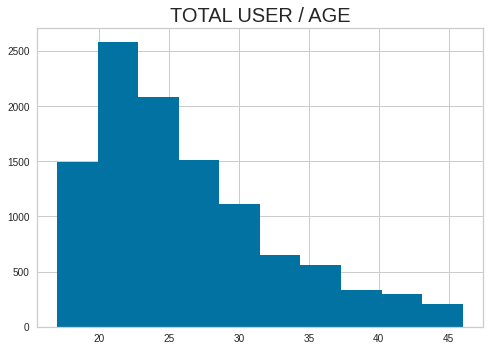

In [ ]:
EDA_1 = df_eop.copy()
EDA_1 = df_eop['user_age'].hist(bins = 10)
plt.title('TOTAL USER / AGE', fontsize=20)
EDA_1

In [ ]:
EDA_1 = df_eop.copy()

EDA_1 = EDA_1.groupby('user_gender')['user_id'].agg('nunique').reset_index()
EDA_1.columns = ['Gender','Num of User']
EDA_1

,Gender,Num of User
0,Female,2923
1,Male,4981


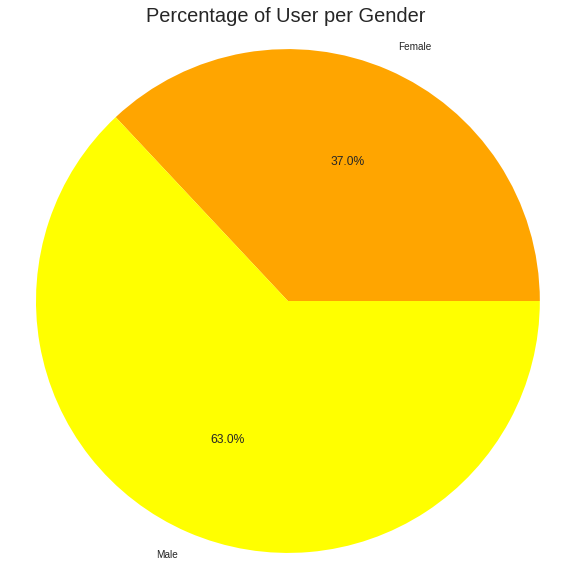

In [ ]:
plt.figure(figsize=(10, 10))

data = EDA_1['Num of User']
labels = EDA_1['Gender']

plt.pie(data,labels=labels,autopct='%1.1f%%',colors=('orange','yellow'))
plt.title('Percentage of User per Gender', fontsize=20)
plt.axis('equal')
plt.show()

## **EDA 2 - Number of Transaction per Month**

In [ ]:
EDA_2 = df_eop.copy()

EDA_2['MonthYear'] = EDA_2['date'].dt.strftime('%Y-%m-01').astype('datetime64')
EDA_2.head()


,user_id,date,user_age,user_gender,user_occupation,user_income_source,user_income_range,total_aum,total_invested,total_transaction,profit,buy,sell,net,MonthYear
0,1004326,2021-08,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"1,806,320.0","1,800,000.0",0.0,"6,320.0",0.0,0.0,0.0,2021-08-01
1,1004326,2021-09,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"4,438,228.0","4,400,000.0",0.0,"38,228.0",0.0,0.0,0.0,2021-09-01
2,1005053,2021-09,31,Male,Swasta,Gaji,> Rp 50 Juta - 100 Juta,"404,275.0","400,000.0",0.0,"4,275.0",0.0,0.0,0.0,2021-09-01
3,1005165,2021-09,22,Female,Pelajar,Undian,< 10 Juta,"2,100,625.0","2,100,000.0",0.0,625.0,0.0,0.0,0.0,2021-09-01
4,1018814,2021-08,20,Male,Others,Undian,< 10 Juta,"1,300,639.0","1,300,000.0",0.0,639.0,0.0,0.0,0.0,2021-08-01


In [ ]:
EDA_2 = EDA_2.groupby('MonthYear')['total_transaction'].agg('nunique').reset_index()
EDA_2.columns = ['Month Year','Total Transaction']
EDA_2

,Month Year,Total Transaction
0,2021-08-01,331
1,2021-09-01,876


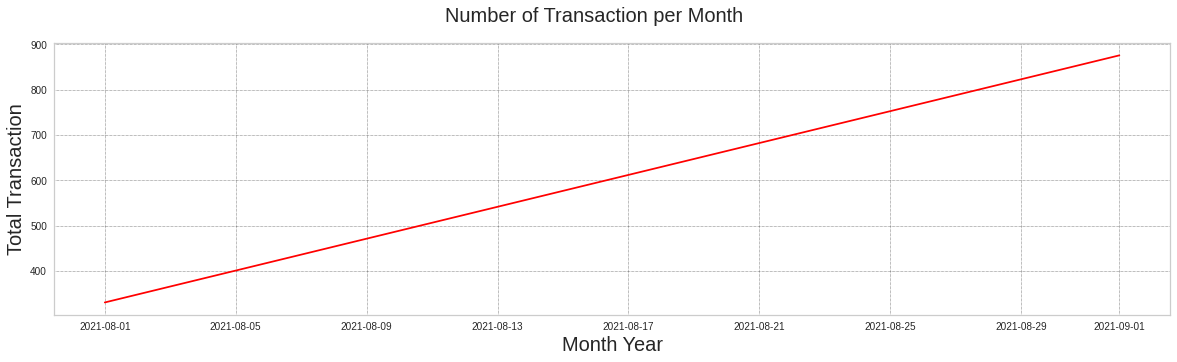

In [ ]:
fig = plt.figure(figsize=(20, 5)) 

fig.suptitle('Number of Transaction per Month', fontsize=20)
plt.xlabel('Month Year', fontsize=20)
plt.ylabel('Total Transaction', fontsize=20)

x = EDA_2['Month Year']
y = EDA_2['Total Transaction']

plt.plot(x, y, color = 'red')
plt.grid(color='black', linestyle=':', linewidth=0.5)
plt.show()

## **EDA 3 - Number of Transaction per Day**

In [ ]:
EDA_3 = df_eopd.copy()

EDA_3['date'] = EDA_3['date'].dt.strftime('%Y-%m-%d').astype('datetime64')
EDA_3 = EDA_3.groupby('date')['total_transaction'].agg('nunique').reset_index()
EDA_3.columns = ['Days','Total Transaction']
EDA_3

,Days,Total Transaction
0,2021-08-04,1
1,2021-08-05,10
2,2021-08-06,18
3,2021-08-09,35
4,2021-08-10,36
5,2021-08-11,43
6,2021-08-12,16
7,2021-08-13,40
8,2021-08-16,62
9,2021-08-17,44


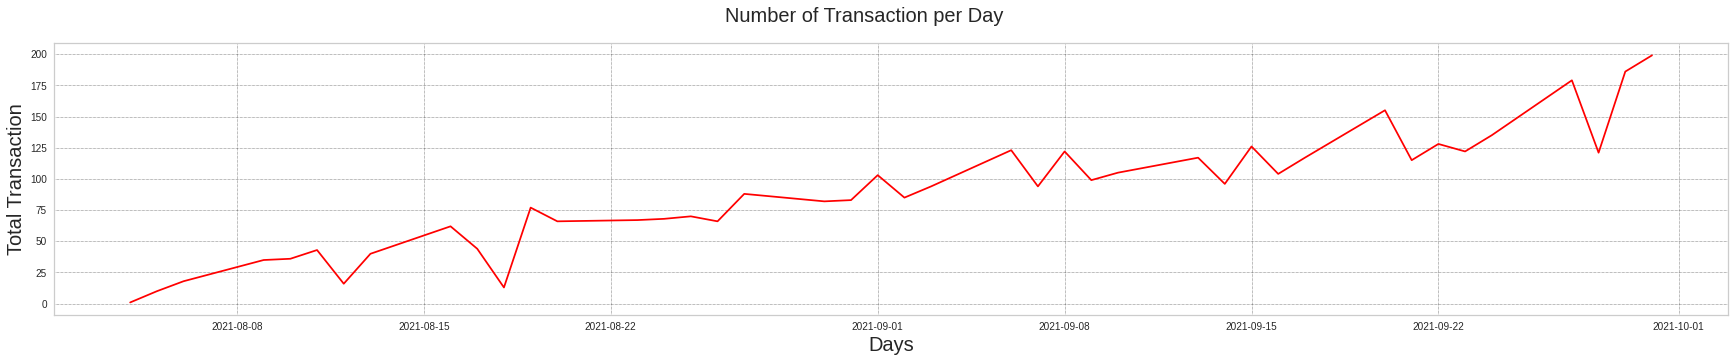

In [ ]:
fig = plt.figure(figsize=(30, 5)) 

fig.suptitle('Number of Transaction per Day', fontsize=20)
plt.xlabel('Days', fontsize=20)
plt.ylabel('Total Transaction', fontsize=20)

x = EDA_3['Days']
y = EDA_3['Total Transaction']

plt.plot(x, y, color = 'red')
plt.grid(color='black', linestyle=':', linewidth=0.5)
plt.show()

## **EDA 4 - Spending Habit between Gender per Day**

In [ ]:
EDA_4 = df_eopd.copy()

EDA_4['date'] = EDA_4['date'].dt.strftime('%Y-%m-%d').astype('datetime64')
EDA_4['day'] = EDA_4['date'].dt.day_name()
EDA_4['days'] = EDA_4['date'].dt.strftime('%w')

EDA_4 = EDA_4.groupby(['day','days','user_gender'])['total_transaction'].agg('nunique').reset_index()
EDA_4.columns = ['Day','Days','Gender','Total Transaction']
EDA_4.sort_values(by='Days',ascending=True,inplace=True)
EDA_4

,Day,Days,Gender,Total Transaction
2,Monday,1,Female,211
3,Monday,1,Male,349
6,Tuesday,2,Female,177
7,Tuesday,2,Male,275
8,Wednesday,3,Female,225
9,Wednesday,3,Male,332
4,Thursday,4,Female,211
5,Thursday,4,Male,338
0,Friday,5,Female,179
1,Friday,5,Male,290


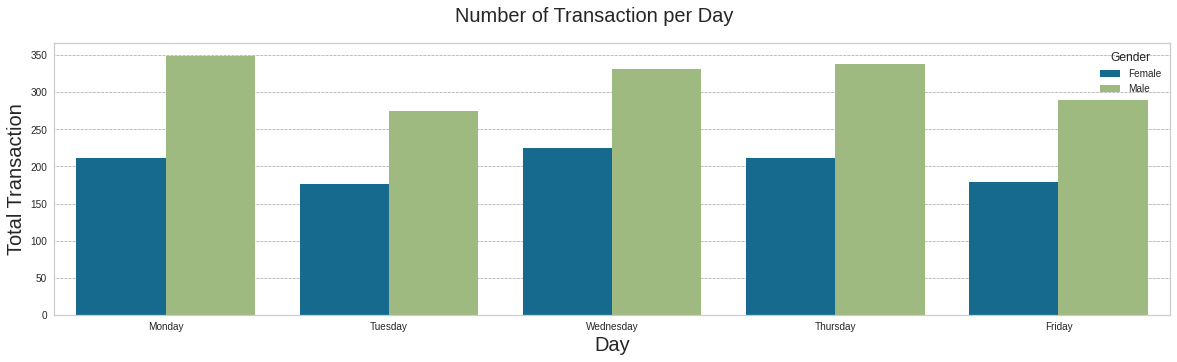

In [ ]:
fig = plt.figure(figsize=(20, 5))

fig.suptitle('Number of Transaction per Day', fontsize=20)
plt.xlabel('Day', fontsize=20)
plt.ylabel('Total Transaction', fontsize=20)
plt.grid(color='black', linestyle=':', linewidth=0.5)

sns.barplot(data=EDA_4, x="Day", y="Total Transaction", hue="Gender")
plt.show()

## **EDA 5 - Monthly Trend of Transaction Amount**

In [ ]:
EDA_5 = df_eopd.copy()

EDA_5['MonthYear'] = EDA_5['date'].dt.strftime('%Y-%m-01').astype('datetime64')
EDA_5


,user_id,date,user_age,user_gender,user_occupation,user_income_source,user_income_range,total_aum,total_invested,total_transaction,profit,buy,sell,net,MonthYear
0,1004326,2021-08-19,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"199,938.0","200,000.0",0.0,-62.0,0.0,0.0,0.0,2021-08-01
1,1004326,2021-08-20,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"200,370.0","200,000.0",0.0,370.0,0.0,0.0,0.0,2021-08-01
2,1004326,2021-08-23,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"201,199.0","200,000.0",0.0,"1,199.0",0.0,0.0,0.0,2021-08-01
3,1004326,2021-08-24,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"200,552.0","200,000.0",0.0,552.0,0.0,0.0,0.0,2021-08-01
4,1004326,2021-08-25,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"200,915.0","200,000.0",0.0,915.0,0.0,0.0,0.0,2021-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151536,997938,2021-09-24,27,Male,Others,Gaji,< 10 Juta,"401,593.0","400,000.0",0.0,"1,593.0",0.0,0.0,0.0,2021-09-01
151537,997938,2021-09-27,27,Male,Others,Gaji,< 10 Juta,"401,106.0","400,000.0",0.0,"1,106.0",0.0,0.0,0.0,2021-09-01
151538,997938,2021-09-28,27,Male,Others,Gaji,< 10 Juta,"401,590.0","400,000.0",0.0,"1,590.0",0.0,0.0,0.0,2021-09-01
151539,997938,2021-09-29,27,Male,Others,Gaji,< 10 Juta,"403,050.0","400,000.0",0.0,"3,050.0",0.0,0.0,0.0,2021-09-01


In [ ]:
EDA_5 = EDA_5.groupby('MonthYear')['total_transaction'].agg('sum').reset_index()
EDA_5.columns = ['Month Year','Total Transaction']
EDA_5

,Month Year,Total Transaction
0,2021-08-01,"2,272,183,748.0"
1,2021-09-01,"6,201,633,752.0"


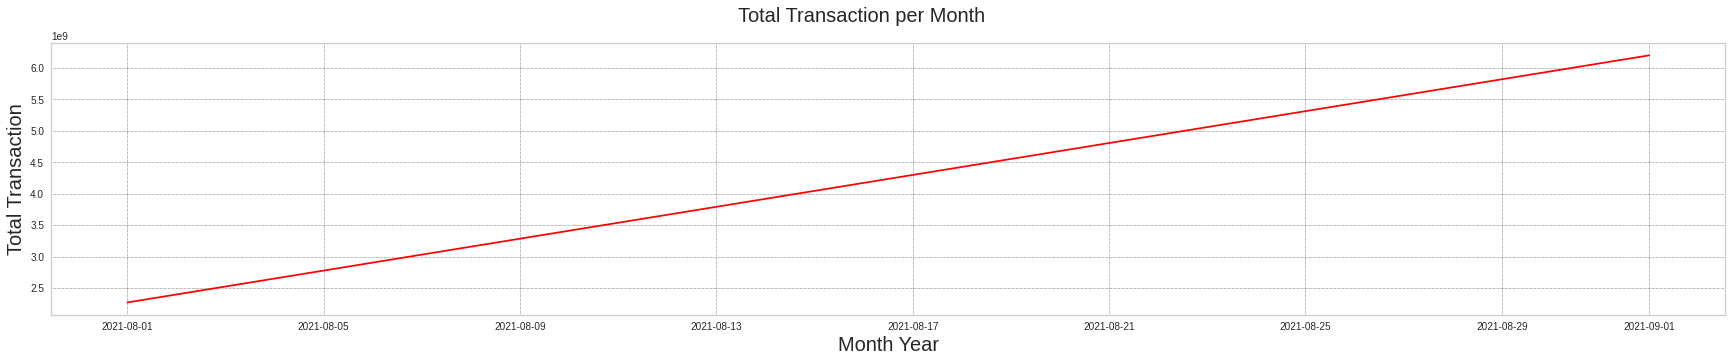

In [ ]:
fig = plt.figure(figsize=(30, 5))

fig.suptitle('Total Transaction per Month', fontsize=20)
plt.xlabel('Month Year', fontsize=20)
plt.ylabel('Total Transaction', fontsize=20)

x = EDA_5['Month Year']
y = EDA_5['Total Transaction']
mean = y.mean()

plt.plot(x, y, color = 'red')
plt.grid(color='black', linestyle=':', linewidth=0.5)
plt.show()

## **EDA 6 - Spending Habit between Gender per Occupation**

In [ ]:
EDA_6 = df_eopd.copy()

EDA_6['date'] = EDA_6['date'].dt.strftime('%Y-%m-%d').astype('datetime64')
EDA_6['day'] = EDA_6['date'].dt.day_name()
EDA_6['days'] = EDA_6['date'].dt.strftime('%w')

EDA_6 = EDA_6.groupby(['day','days','user_occupation'])['total_transaction'].agg('nunique').reset_index()
EDA_6.columns = ['Day','Days','User Occupation','Total Transaction']
EDA_6.sort_values(by='Days',ascending=True,inplace=True)
EDA_6

,Day,Days,User Occupation,Total Transaction
11,Monday,1,PNS,33
15,Monday,1,TNI/Polisi,10
14,Monday,1,Swasta,181
8,Monday,1,Guru,13
9,Monday,1,IRT,51
10,Monday,1,Others,77
13,Monday,1,Pengusaha,39
12,Monday,1,Pelajar,298
26,Tuesday,2,Others,72
27,Tuesday,2,PNS,25


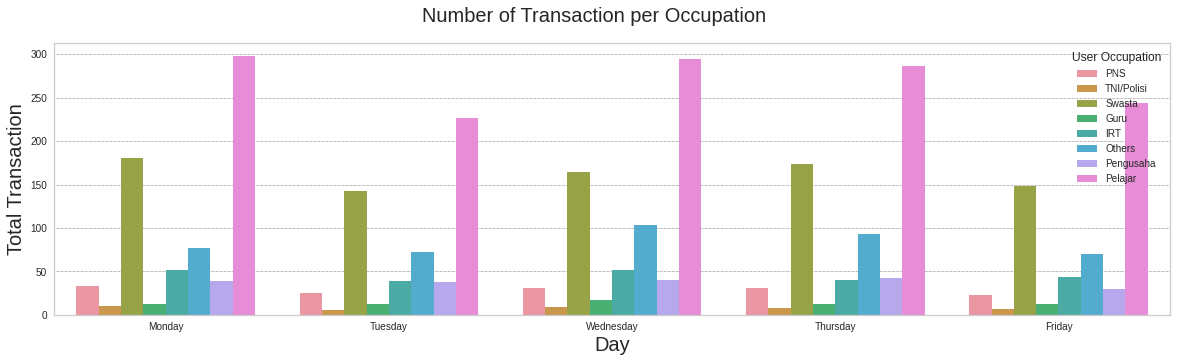

In [ ]:
fig = plt.figure(figsize=(20, 5))

fig.suptitle('Number of Transaction per Occupation', fontsize=20)
plt.xlabel('Day', fontsize=20)
plt.ylabel('Total Transaction', fontsize=20)
plt.grid(color='black', linestyle=':', linewidth=0.5)

sns.barplot(data=EDA_6, x="Day", y="Total Transaction", hue="User Occupation")
plt.show()

## **EDA 7 - Spending Habit between Gender per Income**

In [ ]:
EDA_7 = df_eopd.copy()

EDA_7['date'] = EDA_7['date'].dt.strftime('%Y-%m-%d').astype('datetime64')
EDA_7['day'] = EDA_7['date'].dt.day_name()
EDA_7['days'] = EDA_7['date'].dt.strftime('%w')

EDA_7 = EDA_7.groupby(['day','days','user_income_range'])['total_transaction'].agg('nunique').reset_index()
EDA_7.columns = ['Day','Days','Income','Total Transaction']
EDA_7.sort_values(by='Days',ascending=True,inplace=True)
EDA_7

,Day,Days,Income,Total Transaction
8,Monday,1,> Rp 100 Juta - 500 Juta,87
11,Monday,1,Rp 10 Juta - 50 Juta,190
10,Monday,1,> Rp 500 Juta - 1 Miliar,13
6,Monday,1,< 10 Juta,231
7,Monday,1,> Rp 1 Miliar,2
9,Monday,1,> Rp 50 Juta - 100 Juta,134
20,Tuesday,2,> Rp 100 Juta - 500 Juta,73
21,Tuesday,2,> Rp 50 Juta - 100 Juta,111
22,Tuesday,2,> Rp 500 Juta - 1 Miliar,19
18,Tuesday,2,< 10 Juta,175


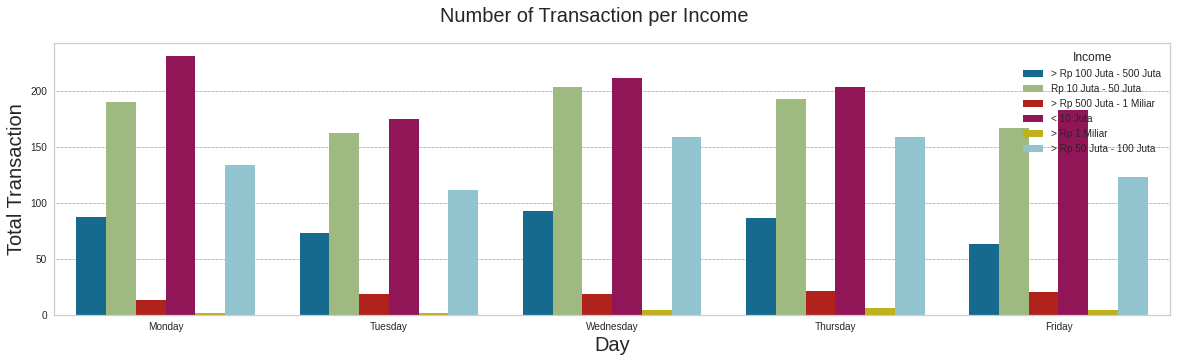

In [ ]:
fig = plt.figure(figsize=(20, 5))

fig.suptitle('Number of Transaction per Income', fontsize=20)
plt.xlabel('Day', fontsize=20)
plt.ylabel('Total Transaction', fontsize=20)
plt.grid(color='black', linestyle=':', linewidth=0.5)

sns.barplot(data=EDA_7, x="Day", y="Total Transaction", hue="Income")
plt.show()

# **CLUSTERING PROCESS**

In [ ]:
CLS = df_eopd.copy()
CLS

,user_id,date,user_age,user_gender,user_occupation,user_income_source,user_income_range,total_aum,total_invested,total_transaction,profit,buy,sell,net
0,1004326,2021-08-19,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"199,938.0","200,000.0",0.0,-62.0,0.0,0.0,0.0
1,1004326,2021-08-20,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"200,370.0","200,000.0",0.0,370.0,0.0,0.0,0.0
2,1004326,2021-08-23,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"201,199.0","200,000.0",0.0,"1,199.0",0.0,0.0,0.0
3,1004326,2021-08-24,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"200,552.0","200,000.0",0.0,552.0,0.0,0.0,0.0
4,1004326,2021-08-25,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"200,915.0","200,000.0",0.0,915.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151536,997938,2021-09-24,27,Male,Others,Gaji,< 10 Juta,"401,593.0","400,000.0",0.0,"1,593.0",0.0,0.0,0.0
151537,997938,2021-09-27,27,Male,Others,Gaji,< 10 Juta,"401,106.0","400,000.0",0.0,"1,106.0",0.0,0.0,0.0
151538,997938,2021-09-28,27,Male,Others,Gaji,< 10 Juta,"401,590.0","400,000.0",0.0,"1,590.0",0.0,0.0,0.0
151539,997938,2021-09-29,27,Male,Others,Gaji,< 10 Juta,"403,050.0","400,000.0",0.0,"3,050.0",0.0,0.0,0.0


In [ ]:
CLS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151541 entries, 0 to 151540
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             151541 non-null  object 
 1   date                151541 non-null  object 
 2   user_age            151541 non-null  int64  
 3   user_gender         151541 non-null  object 
 4   user_occupation     151541 non-null  object 
 5   user_income_source  151541 non-null  object 
 6   user_income_range   151541 non-null  object 
 7   total_aum           151541 non-null  float64
 8   total_invested      151541 non-null  float64
 9   total_transaction   151541 non-null  float64
 10  profit              151541 non-null  float64
 11  buy                 151541 non-null  float64
 12  sell                151541 non-null  float64
 13  net                 151541 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 17.3+ MB


In [ ]:
CLS['date'] = CLS['date'].dt.to_timestamp('s').dt.strftime('%Y-%m-%d')
CLS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151541 entries, 0 to 151540
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             151541 non-null  object 
 1   date                151541 non-null  object 
 2   user_age            151541 non-null  int64  
 3   user_gender         151541 non-null  object 
 4   user_occupation     151541 non-null  object 
 5   user_income_source  151541 non-null  object 
 6   user_income_range   151541 non-null  object 
 7   total_aum           151541 non-null  float64
 8   total_invested      151541 non-null  float64
 9   total_transaction   151541 non-null  float64
 10  profit              151541 non-null  float64
 11  buy                 151541 non-null  float64
 12  sell                151541 non-null  float64
 13  net                 151541 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 17.3+ MB


In [ ]:
CLS['date'] = pd.to_datetime(CLS['date'])
CLS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151541 entries, 0 to 151540
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   user_id             151541 non-null  object        
 1   date                151541 non-null  datetime64[ns]
 2   user_age            151541 non-null  int64         
 3   user_gender         151541 non-null  object        
 4   user_occupation     151541 non-null  object        
 5   user_income_source  151541 non-null  object        
 6   user_income_range   151541 non-null  object        
 7   total_aum           151541 non-null  float64       
 8   total_invested      151541 non-null  float64       
 9   total_transaction   151541 non-null  float64       
 10  profit              151541 non-null  float64       
 11  buy                 151541 non-null  float64       
 12  sell                151541 non-null  float64       
 13  net                 151541 no

In [ ]:
CLS

,user_id,date,user_age,user_gender,user_occupation,user_income_source,user_income_range,total_aum,total_invested,total_transaction,profit,buy,sell,net
0,1004326,2021-08-19,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"199,938.0","200,000.0",0.0,-62.0,0.0,0.0,0.0
1,1004326,2021-08-20,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"200,370.0","200,000.0",0.0,370.0,0.0,0.0,0.0
2,1004326,2021-08-23,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"201,199.0","200,000.0",0.0,"1,199.0",0.0,0.0,0.0
3,1004326,2021-08-24,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"200,552.0","200,000.0",0.0,552.0,0.0,0.0,0.0
4,1004326,2021-08-25,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"200,915.0","200,000.0",0.0,915.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151536,997938,2021-09-24,27,Male,Others,Gaji,< 10 Juta,"401,593.0","400,000.0",0.0,"1,593.0",0.0,0.0,0.0
151537,997938,2021-09-27,27,Male,Others,Gaji,< 10 Juta,"401,106.0","400,000.0",0.0,"1,106.0",0.0,0.0,0.0
151538,997938,2021-09-28,27,Male,Others,Gaji,< 10 Juta,"401,590.0","400,000.0",0.0,"1,590.0",0.0,0.0,0.0
151539,997938,2021-09-29,27,Male,Others,Gaji,< 10 Juta,"403,050.0","400,000.0",0.0,"3,050.0",0.0,0.0,0.0


In [ ]:
# filter transaction past 30 days
CLS = CLS.loc[(CLS['date'] >= '2021-09-01')
            & (CLS['date'] < '2021-09-30')]

# active transaction = total transaction != 0
CLS = CLS[CLS.total_transaction != 0]

CLS

,user_id,date,user_age,user_gender,user_occupation,user_income_source,user_income_range,total_aum,total_invested,total_transaction,profit,buy,sell,net
73,1018814,2021-09-27,20,Male,Others,Undian,< 10 Juta,0.0,0.0,"-1,300,000.0",0.0,0.0,"-1,300,000.0","1,300,000.0"
113,1024581,2021-09-10,25,Male,Pelajar,Gaji,Rp 10 Juta - 50 Juta,"124,878.0","125,000.0","25,000.0",-122.0,"25,000.0",0.0,"25,000.0"
117,1024581,2021-09-16,25,Male,Pelajar,Gaji,Rp 10 Juta - 50 Juta,0.0,0.0,"-125,000.0",0.0,0.0,"-125,000.0","125,000.0"
130,103108,2021-09-03,42,Male,Swasta,Gaji,> Rp 500 Juta - 1 Miliar,"4,051,117.0","4,000,000.0","3,000,000.0","51,117.0","3,000,000.0",0.0,"3,000,000.0"
134,103108,2021-09-09,42,Male,Swasta,Gaji,> Rp 500 Juta - 1 Miliar,"6,032,053.0","6,000,000.0","2,000,000.0","32,053.0","2,000,000.0",0.0,"2,000,000.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151460,989618,2021-09-22,29,Male,Pelajar,Gaji,< 10 Juta,"2,984,636.0","3,000,000.0","1,000,000.0","-15,364.0","1,000,000.0",0.0,"1,000,000.0"
151469,990466,2021-09-01,33,Male,Swasta,Gaji,< 10 Juta,"1,000,867.0","1,000,000.0","500,000.0",867.0,"500,000.0",0.0,"500,000.0"
151489,990466,2021-09-29,33,Male,Swasta,Gaji,< 10 Juta,"1,260,209.0","1,240,000.0","240,000.0","20,209.0","240,000.0",0.0,"240,000.0"
151521,997938,2021-09-03,27,Male,Others,Gaji,< 10 Juta,"150,214.0","150,000.0","100,000.0",214.0,"100,000.0",0.0,"100,000.0"


In [ ]:
Cluster = CLS.copy()

**- change data  categorical string to numeric (encoding)**

In [ ]:
Cluster['user_gender'] = Cluster['user_gender'].astype('category')
Cluster['user_gender'] = Cluster['user_gender'].cat.codes

In [ ]:
Cluster['user_occupation'] = Cluster['user_occupation'].astype('category')
Cluster['user_occupation'] = Cluster['user_occupation'].cat.codes

In [ ]:
Cluster['user_income_source'] = Cluster['user_income_source'].astype('category')
Cluster['user_income_source'] = Cluster['user_income_source'].cat.codes

In [ ]:
Cluster['user_income_range'] = Cluster['user_income_range'].astype('category')
Cluster['user_income_range'] = Cluster['user_income_range'].cat.codes

In [ ]:
Cluster

,user_id,date,user_age,user_gender,user_occupation,user_income_source,user_income_range,total_aum,total_invested,total_transaction,profit,buy,sell,net
73,1018814,2021-09-27,20,1,2,8,0,0.0,0.0,"-1,300,000.0",0.0,0.0,"-1,300,000.0","1,300,000.0"
113,1024581,2021-09-10,25,1,4,3,5,"124,878.0","125,000.0","25,000.0",-122.0,"25,000.0",0.0,"25,000.0"
117,1024581,2021-09-16,25,1,4,3,5,0.0,0.0,"-125,000.0",0.0,0.0,"-125,000.0","125,000.0"
130,103108,2021-09-03,42,1,6,3,4,"4,051,117.0","4,000,000.0","3,000,000.0","51,117.0","3,000,000.0",0.0,"3,000,000.0"
134,103108,2021-09-09,42,1,6,3,4,"6,032,053.0","6,000,000.0","2,000,000.0","32,053.0","2,000,000.0",0.0,"2,000,000.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151460,989618,2021-09-22,29,1,4,3,0,"2,984,636.0","3,000,000.0","1,000,000.0","-15,364.0","1,000,000.0",0.0,"1,000,000.0"
151469,990466,2021-09-01,33,1,6,3,0,"1,000,867.0","1,000,000.0","500,000.0",867.0,"500,000.0",0.0,"500,000.0"
151489,990466,2021-09-29,33,1,6,3,0,"1,260,209.0","1,240,000.0","240,000.0","20,209.0","240,000.0",0.0,"240,000.0"
151521,997938,2021-09-03,27,1,2,3,0,"150,214.0","150,000.0","100,000.0",214.0,"100,000.0",0.0,"100,000.0"


In [ ]:
Cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7237 entries, 73 to 151534
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             7237 non-null   object        
 1   date                7237 non-null   datetime64[ns]
 2   user_age            7237 non-null   int64         
 3   user_gender         7237 non-null   int8          
 4   user_occupation     7237 non-null   int8          
 5   user_income_source  7237 non-null   int8          
 6   user_income_range   7237 non-null   int8          
 7   total_aum           7237 non-null   float64       
 8   total_invested      7237 non-null   float64       
 9   total_transaction   7237 non-null   float64       
 10  profit              7237 non-null   float64       
 11  buy                 7237 non-null   float64       
 12  sell                7237 non-null   float64       
 13  net                 7237 non-null   float64  

# **CLUSTERING**

In [ ]:
df_cluster = Cluster.drop(['user_id','date'],axis=1)

In [ ]:
df_cluster

,user_age,user_gender,user_occupation,user_income_source,user_income_range,total_aum,total_invested,total_transaction,profit,buy,sell,net
73,20,1,2,8,0,0.0,0.0,"-1,300,000.0",0.0,0.0,"-1,300,000.0","1,300,000.0"
113,25,1,4,3,5,"124,878.0","125,000.0","25,000.0",-122.0,"25,000.0",0.0,"25,000.0"
117,25,1,4,3,5,0.0,0.0,"-125,000.0",0.0,0.0,"-125,000.0","125,000.0"
130,42,1,6,3,4,"4,051,117.0","4,000,000.0","3,000,000.0","51,117.0","3,000,000.0",0.0,"3,000,000.0"
134,42,1,6,3,4,"6,032,053.0","6,000,000.0","2,000,000.0","32,053.0","2,000,000.0",0.0,"2,000,000.0"
...,...,...,...,...,...,...,...,...,...,...,...,...
151460,29,1,4,3,0,"2,984,636.0","3,000,000.0","1,000,000.0","-15,364.0","1,000,000.0",0.0,"1,000,000.0"
151469,33,1,6,3,0,"1,000,867.0","1,000,000.0","500,000.0",867.0,"500,000.0",0.0,"500,000.0"
151489,33,1,6,3,0,"1,260,209.0","1,240,000.0","240,000.0","20,209.0","240,000.0",0.0,"240,000.0"
151521,27,1,2,3,0,"150,214.0","150,000.0","100,000.0",214.0,"100,000.0",0.0,"100,000.0"


In [ ]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7237 entries, 73 to 151534
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_age            7237 non-null   int64  
 1   user_gender         7237 non-null   int8   
 2   user_occupation     7237 non-null   int8   
 3   user_income_source  7237 non-null   int8   
 4   user_income_range   7237 non-null   int8   
 5   total_aum           7237 non-null   float64
 6   total_invested      7237 non-null   float64
 7   total_transaction   7237 non-null   float64
 8   profit              7237 non-null   float64
 9   buy                 7237 non-null   float64
 10  sell                7237 non-null   float64
 11  net                 7237 non-null   float64
dtypes: float64(7), int64(1), int8(4)
memory usage: 537.1 KB


## **Elbow Method**

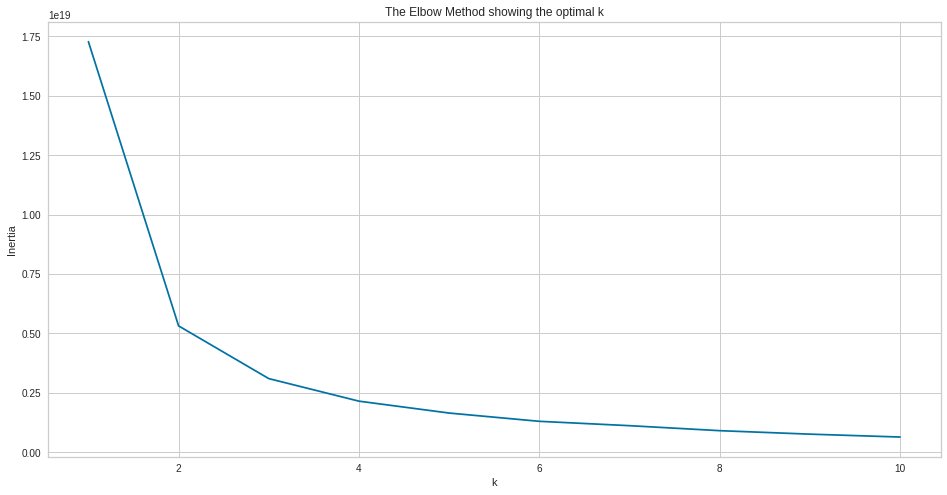

In [ ]:
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(df_cluster)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## **Silhouette Method**

For k=2, the average silhouette score is 0.9874385124788032
For k=3, the average silhouette score is 0.9817169789952764
For k=4, the average silhouette score is 0.944575282743743
For k=5, the average silhouette score is 0.9421479849098358
For k=6, the average silhouette score is 0.9344114899813103
For k=7, the average silhouette score is 0.884016632420438
For k=8, the average silhouette score is 0.877742168562646
For k=9, the average silhouette score is 0.8777706086976084
For k=10, the average silhouette score is 0.8625157574854266


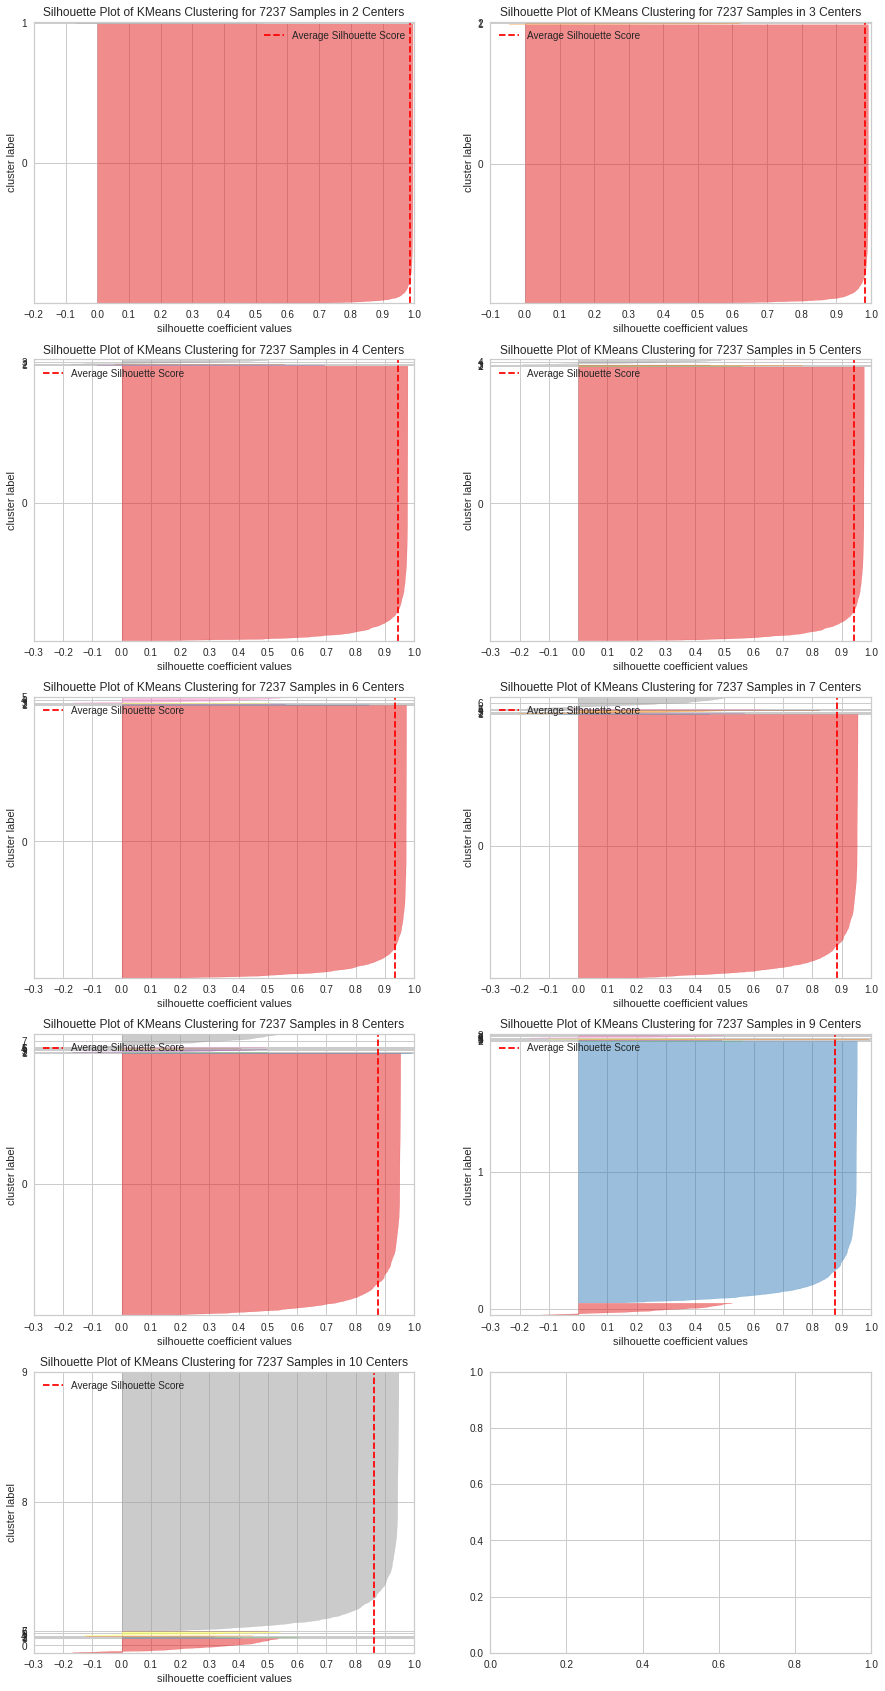

In [ ]:
K = range(2,11)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel = cluster.KMeans(n_clusters)

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = False, ax = ax[q-1][mod])
  sil.fit(df_cluster)
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

In [ ]:
# implement clustering Kmeans dengan N Cluster = 2
cluster_model = cluster.KMeans(n_clusters=2, random_state = 42)
cluster_model.fit(df_cluster)
cluster_label = cluster_model.labels_
CLS['cluster'] = cluster_label
CLS

,user_id,date,user_age,user_gender,user_occupation,user_income_source,user_income_range,total_aum,total_invested,total_transaction,profit,buy,sell,net,cluster
73,1018814,2021-09-27,20,Male,Others,Undian,< 10 Juta,0.0,0.0,"-1,300,000.0",0.0,0.0,"-1,300,000.0","1,300,000.0",0
113,1024581,2021-09-10,25,Male,Pelajar,Gaji,Rp 10 Juta - 50 Juta,"124,878.0","125,000.0","25,000.0",-122.0,"25,000.0",0.0,"25,000.0",0
117,1024581,2021-09-16,25,Male,Pelajar,Gaji,Rp 10 Juta - 50 Juta,0.0,0.0,"-125,000.0",0.0,0.0,"-125,000.0","125,000.0",0
130,103108,2021-09-03,42,Male,Swasta,Gaji,> Rp 500 Juta - 1 Miliar,"4,051,117.0","4,000,000.0","3,000,000.0","51,117.0","3,000,000.0",0.0,"3,000,000.0",0
134,103108,2021-09-09,42,Male,Swasta,Gaji,> Rp 500 Juta - 1 Miliar,"6,032,053.0","6,000,000.0","2,000,000.0","32,053.0","2,000,000.0",0.0,"2,000,000.0",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151460,989618,2021-09-22,29,Male,Pelajar,Gaji,< 10 Juta,"2,984,636.0","3,000,000.0","1,000,000.0","-15,364.0","1,000,000.0",0.0,"1,000,000.0",0
151469,990466,2021-09-01,33,Male,Swasta,Gaji,< 10 Juta,"1,000,867.0","1,000,000.0","500,000.0",867.0,"500,000.0",0.0,"500,000.0",0
151489,990466,2021-09-29,33,Male,Swasta,Gaji,< 10 Juta,"1,260,209.0","1,240,000.0","240,000.0","20,209.0","240,000.0",0.0,"240,000.0",0
151521,997938,2021-09-03,27,Male,Others,Gaji,< 10 Juta,"150,214.0","150,000.0","100,000.0",214.0,"100,000.0",0.0,"100,000.0",0


In [ ]:
CLS.groupby('cluster')['user_id'].agg(['count'])

,count
cluster,
0,7215
1,22


In [ ]:
CLS.groupby(['cluster'])['total_transaction'].agg(['count','mean','median','max','min'])

,count,mean,median,max,min
cluster,,,,,
0,7215,"463,406.84116424114","50,000.0","114,000,000.0","-100,000,000.0"
1,22,"104,333,982.95454545","25,000,000.0","450,000,000.0","-1,100,000.0"


In [ ]:
CLS.groupby(['cluster'])['user_age'].agg(['count','mean','median','max','min'])

,count,mean,median,max,min
cluster,,,,,
0,7215,26.617740817740817,25.0,46,17
1,22,36.90909090909091,33.0,46,23


In [ ]:
CLS.groupby(['cluster'])['user_occupation'].describe()

,count,unique,top,freq
cluster,,,,
0,7215,8,Pelajar,3927
1,22,4,Pengusaha,13


In [ ]:
CLS.groupby(['cluster'])['user_income_range'].describe()

,count,unique,top,freq
cluster,,,,
0,7215,6,< 10 Juta,2935
1,22,4,> Rp 100 Juta - 500 Juta,11


In [ ]:
CLS.groupby(['cluster'])['user_income_source'].describe()

,count,unique,top,freq
cluster,,,,
0,7215,10,Gaji,4534
1,22,4,Keuntungan Bisnis,12


In [ ]:
CLS.groupby(['cluster'])['user_age','user_occupation','user_income_range','user_income_source','total_transaction'].agg(['mean','min','max','std'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


user_age                              total_transaction  \
                      mean min max               std                 mean   
cluster                                                                     
0       26.617740817740817  17  46 6.858987304579009  463,406.84116424114   
1        36.90909090909091  23  46 7.476369700336113 104,333,982.95454545   

                                                          
                   min           max                 std  
cluster                                                   
0       -100,000,000.0 114,000,000.0 4,362,442.695952017  
1         -1,100,000.0 450,000,000.0 139,138,054.8872806